In [1]:
# ID: IT17044400
# Name: Hariharan Vasudevan

import numpy as np
import pandas as pd

from pandas import Series, DataFrame

import scipy
from scipy.stats import spearmanr

from pylab import rcParams
import seaborn as sb
import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing

In [5]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

In [7]:
# Reading the dataset to a temporary variable

address = 'F:/UNI/4th year 1st semester/ML/Study/Labs/Final Assignment/IT17044400/Social_Network_Ads.csv'
temp = pd.read_csv(address)
temp.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


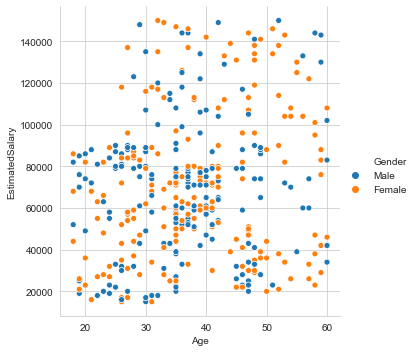

In [8]:
# Independant (features) Data: Gender, Age and Estimated Salary
# Data for prediction: Purchased
# Graphical data interpretation

# Seaborn plot on the Gender, Age and Estimated Salary

sb.relplot(x="Age", y="EstimatedSalary", hue="Gender", data=temp);

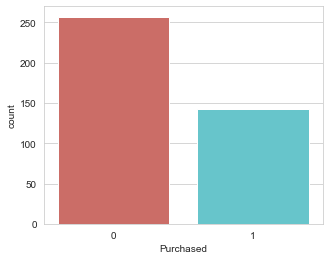

In [9]:
# Graphical interpretation the prdiction vriable Purchased

sb.countplot(x='Purchased', data = temp, palette = 'hls')

In [10]:
gender = temp['Gender']
age = temp['Age']
estimatedSalary = temp['EstimatedSalary']
var4 = 2.35245

# Spearman Rank Coefficient on Gender and EstimatedSalary

spearmanr_coefficient, p_value = spearmanr(gender, estimatedSalary)
'Spearmanr Rank Correlation Coefficient on Gender and EstimatedSalary {:0.3f}'.format(spearmanr_coefficient)

'Spearmanr Rank Correlation Coefficient on Gender and EstimatedSalary -0.044'

In [11]:
# Spearman Rank Coefficient on Gender and Age

spearmanr_coefficient, p_value = spearmanr(gender, age)
'Spearmanr Rank Correlation Coefficient on Gender and Age {:0.3f}'.format(spearmanr_coefficient)

'Spearmanr Rank Correlation Coefficient on Gender and Age -0.068'

In [12]:
# Spearman Rank Coefficient on Age and EstimatedSalary

spearmanr_coefficient, p_value = spearmanr(age, estimatedSalary)
'Spearmanr Rank Correlation Coefficient on Age and EstimatedSalary {:0.3f}'.format(spearmanr_coefficient)

'Spearmanr Rank Correlation Coefficient on Age and EstimatedSalary 0.125'

In [13]:
# Checking all the columns for data preprocessing

null_columns=temp.columns[temp.isnull().any()]
temp[null_columns].isnull().sum()

Series([], dtype: float64)

In [14]:
# Data preprocessing

# creating a dict file  
gender = {'Male': 1,'Female': 2}

# Traversing through dataframe 
# Gender column and writing 
# values where key matches 
temp.Gender = [gender[item] for item in temp.Gender]
temp.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,2,26,43000,0
3,15603246,2,27,57000,0
4,15804002,1,19,76000,0


In [15]:
# Independant (features) Data: Gender, Age, Estimated Salary
# Data for prediction: Purchased
person_data = temp.ix[:,(1,2,3)].values
person_data_names = ['Gender','Age', 'EstimatedSalary']

y = temp.ix[:,4].values

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\indexing.py:961: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  return getattr(section, self.name)[new_key]
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix

In [16]:
# View of person data

person_data

array([[    1,    19, 19000],
       [    1,    35, 20000],
       [    2,    26, 43000],
       ...,
       [    2,    50, 20000],
       [    1,    36, 33000],
       [    2,    49, 36000]], dtype=int64)

In [17]:
# View of y variable

y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [18]:
# Defining X variable
# Scaling the features

X = scale(person_data)
print(type(X))
X

<class 'numpy.ndarray'>


array([[-1.02020406, -1.78179743, -1.49004624],
       [-1.02020406, -0.25358736, -1.46068138],
       [ 0.98019606, -1.11320552, -0.78528968],
       ...,
       [ 0.98019606,  1.17910958, -1.46068138],
       [-1.02020406, -0.15807423, -1.07893824],
       [ 0.98019606,  1.08359645, -0.99084367]])

In [19]:
# Logistic regression prediction

LogReg = LogisticRegression()

LogReg.fit(X, y)
'{:f}'.format(LogReg.score(X, y))

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


'0.852500'

In [20]:
# Prediction report

y_pred = LogReg.predict(X)
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       257
           1       0.84      0.73      0.78       143

    accuracy                           0.85       400
   macro avg       0.85      0.82      0.83       400
weighted avg       0.85      0.85      0.85       400



Text(30.5, 0.5, 'predicted class')

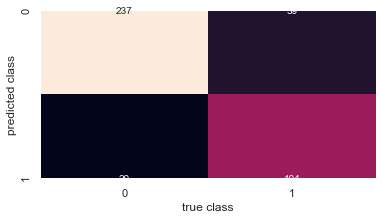

In [22]:
from sklearn.metrics import confusion_matrix 
import seaborn as sns; sns.set() 
get_ipython().run_line_magic('matplotlib', 'inline') 
import matplotlib.pyplot as plt 
 
mat = confusion_matrix(y, y_pred) 
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False) 
plt.xlabel('true class') 
plt.ylabel('predicted class')